In [1]:
from scipy.stats import skew
%matplotlib inline
import pandas as pd
import matplotlib.pyplot as plt
import pickle
import numpy as np
import statsmodels.formula.api as smf
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

from sklearn.linear_model import LinearRegression
from sklearn .model_selection import train_test_split
from sklearn.metrics import r2_score
import seaborn as sns

In [2]:
df_train=pd.read_csv("bigdatamart_train.csv")
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [3]:
df_test=pd.read_csv("bigdatamart_test.csv")
df_test

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDW58,20.750,Low Fat,0.007565,Snack Foods,107.8622,OUT049,1999,Medium,Tier 1,Supermarket Type1
1,FDW14,8.300,reg,0.038428,Dairy,87.3198,OUT017,2007,NaN,Tier 2,Supermarket Type1
2,NCN55,14.600,Low Fat,0.099575,Others,241.7538,OUT010,1998,NaN,Tier 3,Grocery Store
3,FDQ58,7.315,Low Fat,0.015388,Snack Foods,155.0340,OUT017,2007,NaN,Tier 2,Supermarket Type1
4,FDY38,NaN,Regular,0.118599,Dairy,234.2300,OUT027,1985,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...,...,...,...
5676,FDB58,10.500,Regular,0.013496,Snack Foods,141.3154,OUT046,1997,Small,Tier 1,Supermarket Type1
5677,FDD47,7.600,Regular,0.142991,Starchy Foods,169.1448,OUT018,2009,Medium,Tier 3,Supermarket Type2
5678,NCO17,10.000,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,2002,NaN,Tier 2,Supermarket Type1
5679,FDJ26,15.300,Regular,0.000000,Canned,214.6218,OUT017,2007,NaN,Tier 2,Supermarket Type1


In [4]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [5]:
df_train.isnull().sum()

Item_Identifier                 0
Item_Weight                  1463
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  2410
Outlet_Location_Type            0
Outlet_Type                     0
Item_Outlet_Sales               0
dtype: int64

In [6]:
#we can see tha item_weight and outlet_type hv null values

In [7]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5681 entries, 0 to 5680
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            5681 non-null   object 
 1   Item_Weight                4705 non-null   float64
 2   Item_Fat_Content           5681 non-null   object 
 3   Item_Visibility            5681 non-null   float64
 4   Item_Type                  5681 non-null   object 
 5   Item_MRP                   5681 non-null   float64
 6   Outlet_Identifier          5681 non-null   object 
 7   Outlet_Establishment_Year  5681 non-null   int64  
 8   Outlet_Size                4075 non-null   object 
 9   Outlet_Location_Type       5681 non-null   object 
 10  Outlet_Type                5681 non-null   object 
dtypes: float64(3), int64(1), object(7)
memory usage: 488.3+ KB


In [8]:
df_test.isnull().sum()

Item_Identifier                 0
Item_Weight                   976
Item_Fat_Content                0
Item_Visibility                 0
Item_Type                       0
Item_MRP                        0
Outlet_Identifier               0
Outlet_Establishment_Year       0
Outlet_Size                  1606
Outlet_Location_Type            0
Outlet_Type                     0
dtype: int64

In [9]:
#we can see tha item_weight and outlet_type hv null values

In [10]:
df_train.loc[df_train['Outlet_Type']=='']#checkling columns for blank spaces

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales


In [11]:
df_test.loc[df_test['Item_Identifier']=='']#checkling columns for blank spaces

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type


In [12]:
df_train['Item_Weight'].dtype

dtype('float64')

In [13]:
df_train['Outlet_Size'].unique()

array(['Medium', nan, 'High', 'Small'], dtype=object)

In [14]:
df_train['Item_Weight']=df_train['Item_Weight'].fillna(df_train['Item_Weight'].mean())
df_train['Outlet_Size']=df_train['Outlet_Size'].fillna(df_train['Outlet_Size'].mode()[0])

df_test['Item_Weight']=df_test['Item_Weight'].fillna(df_test['Item_Weight'].mean())
df_test['Outlet_Size']=df_test['Outlet_Size'].fillna(df_test['Outlet_Size'].mode()[0])

In [15]:
df_train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [16]:
df_train.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

In [17]:
df_test.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
dtype: int64

In [18]:
# we have successfully filled the null values.

In [19]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [20]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [21]:
#we can see that the 

In [22]:
df_test.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year
count,5681.000000,5681.000000,5681.000000,5681.000000
mean,12.695633,0.065684,141.023273,1997.828903
std,4.245189,0.051252,61.809091,8.372256
min,4.555000,0.000000,31.990000,1985.000000
25%,9.195000,0.027047,94.412000,1987.000000
50%,12.695633,0.054154,141.415400,1999.000000
75%,15.850000,0.093463,186.026600,2004.000000
max,21.350000,0.323637,266.588400,2009.000000


In [23]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [24]:
df_train['Item_Identifier'].unique()

array(['FDA15', 'DRC01', 'FDN15', ..., 'NCF55', 'NCW30', 'NCW05'],
      dtype=object)

In [25]:
df_train['Item_Fat_Content'].unique()

array(['Low Fat', 'Regular', 'low fat', 'LF', 'reg'], dtype=object)

In [26]:
df_train['Item_Type'].unique()

array(['Dairy', 'Soft Drinks', 'Meat', 'Fruits and Vegetables',
       'Household', 'Baking Goods', 'Snack Foods', 'Frozen Foods',
       'Breakfast', 'Health and Hygiene', 'Hard Drinks', 'Canned',
       'Breads', 'Starchy Foods', 'Others', 'Seafood'], dtype=object)

In [27]:
df_train['Outlet_Identifier'].unique()

array(['OUT049', 'OUT018', 'OUT010', 'OUT013', 'OUT027', 'OUT045',
       'OUT017', 'OUT046', 'OUT035', 'OUT019'], dtype=object)

In [28]:
df_train['Outlet_Size'].unique()

array(['Medium', 'High', 'Small'], dtype=object)

In [29]:
df_train['Outlet_Location_Type'].unique()

array(['Tier 1', 'Tier 3', 'Tier 2'], dtype=object)

In [30]:
df_train['Outlet_Type'].unique()

array(['Supermarket Type1', 'Supermarket Type2', 'Grocery Store',
       'Supermarket Type3'], dtype=object)

In [31]:
sns.set()

In [32]:
#after obseving this kind of dataset we can see we have many kinds of categorical data .

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


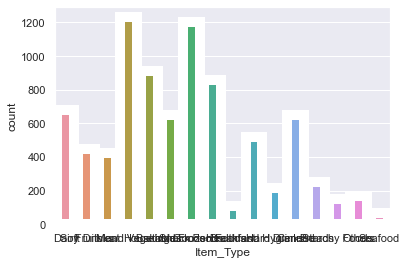

In [33]:
ax=sns.countplot(x='Item_Type',data=df_train,linewidth=10)
print(df_train["Item_Type"].value_counts())

In [34]:
#we can see from this that fruit and vegetable have the highest count in this section 

FDG33    10
FDW13    10
NCJ30     9
FDF56     9
FDO19     9
         ..
FDO33     1
FDQ60     1
FDE52     1
FDN52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64


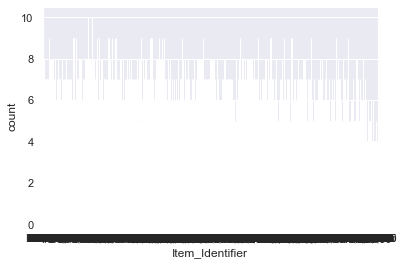

In [35]:
ax=sns.countplot(x='Item_Identifier',data=df_train)
print(df_train["Item_Identifier"].value_counts())

In [36]:
# we cant judge much from this data

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


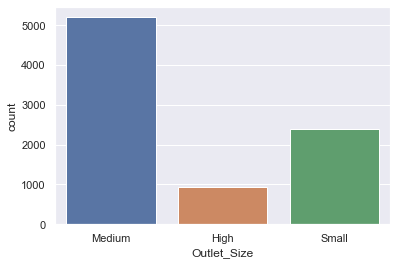

In [37]:
ax=sns.countplot(x='Outlet_Size',data=df_train)
print(df_train["Outlet_Size"].value_counts())

In [38]:
#we can see that medium outlet have the most counts

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


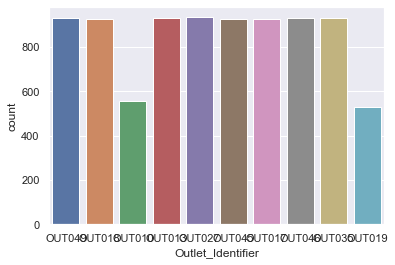

In [39]:
ax=sns.countplot(x='Outlet_Identifier',data=df_train)
print(df_train["Outlet_Identifier"].value_counts())

In [40]:
# this also cantnot judge through this plot

In [41]:
#we are ploting dist plot for continuos data

In [42]:
df_train.describe()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
count,8523.000000,8523.000000,8523.000000,8523.000000,8523.000000
mean,12.857645,0.066132,140.992782,1997.831867,2181.288914
std,4.226124,0.051598,62.275067,8.371760,1706.499616
min,4.555000,0.000000,31.290000,1985.000000,33.290000
25%,9.310000,0.026989,93.826500,1987.000000,834.247400
50%,12.857645,0.053931,143.012800,1999.000000,1794.331000
75%,16.000000,0.094585,185.643700,2004.000000,3101.296400
max,21.350000,0.328391,266.888400,2009.000000,13086.964800


In [43]:
#we can see from this everything is looking normal

In [44]:
df_train

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Medium,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [45]:
cat=df_train.select_dtypes('object')
cont=df_train.select_dtypes('number')


In [46]:
cat

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [47]:
cont.shape

(8523, 5)

In [48]:
cat.columns

Index(['Item_Identifier', 'Item_Fat_Content', 'Item_Type', 'Outlet_Identifier',
       'Outlet_Size', 'Outlet_Location_Type', 'Outlet_Type'],
      dtype='object')

In [49]:
df_train.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

FDG33    10
FDW13    10
NCJ30     9
FDF56     9
FDO19     9
         ..
FDO33     1
FDQ60     1
FDE52     1
FDN52     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64


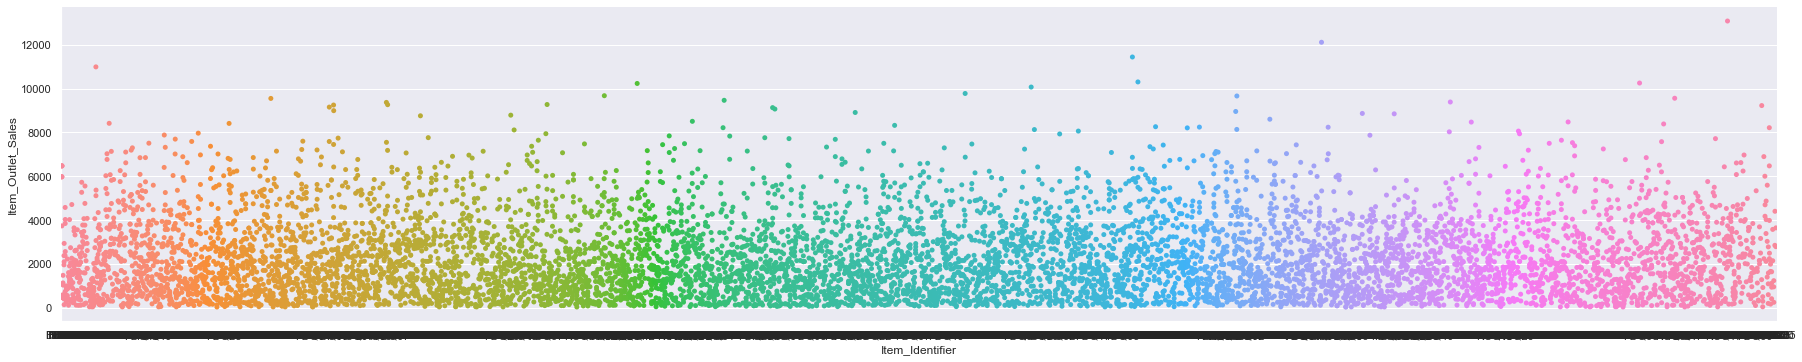

In [50]:
sns.catplot(x='Item_Identifier',y='Item_Outlet_Sales',data=df_train,aspect=5)
print(cat["Item_Identifier"].value_counts())

In [51]:
#we can say that this column should not be included it has no use here for sales.

Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64


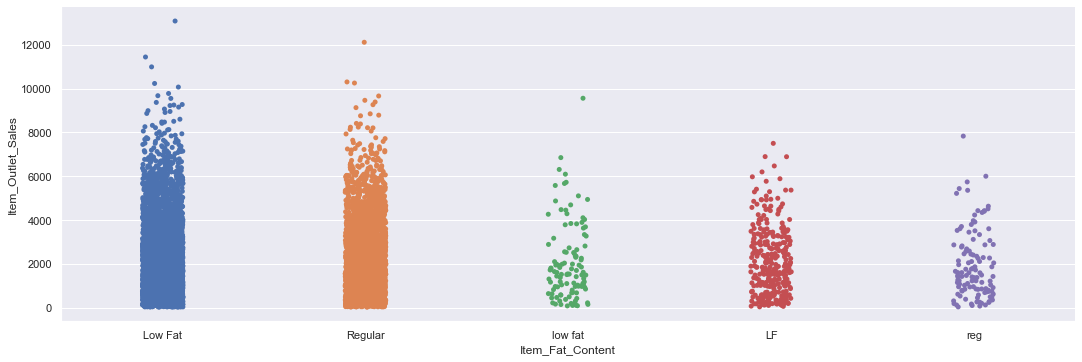

In [52]:
sns.catplot(x='Item_Fat_Content',y='Item_Outlet_Sales',data=df_train,aspect=3)
print(cat["Item_Fat_Content"].value_counts())

In [53]:
#we can say that  low fat item are and regular items are generating more sales.

Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name: Item_Type, dtype: int64


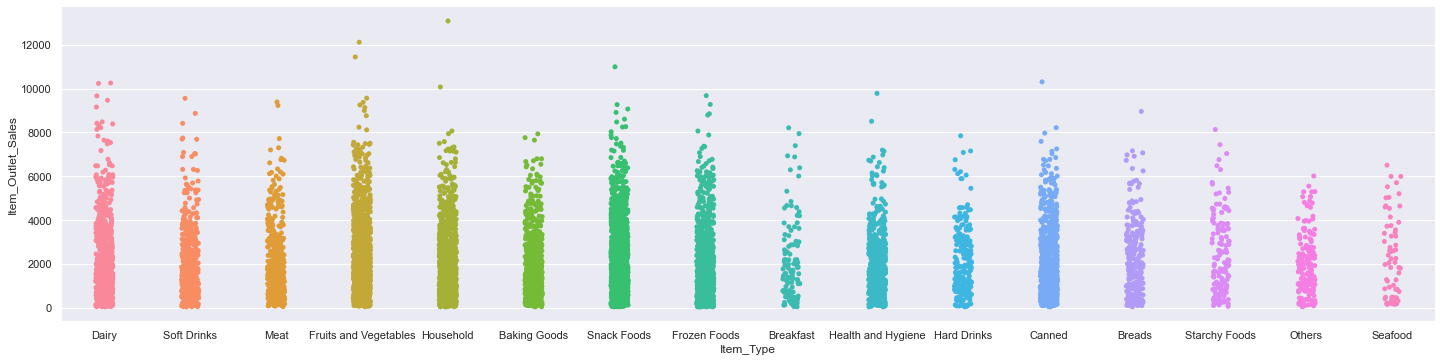

In [54]:
sns.catplot(x='Item_Type',y='Item_Outlet_Sales',data=df_train,aspect=4)
print(cat["Item_Type"].value_counts())

In [55]:
#we can see that diary fruit and vegetable ,snacks,are generating most sales and seafood and other are generating lower sales.

OUT027    935
OUT013    932
OUT046    930
OUT035    930
OUT049    930
OUT045    929
OUT018    928
OUT017    926
OUT010    555
OUT019    528
Name: Outlet_Identifier, dtype: int64


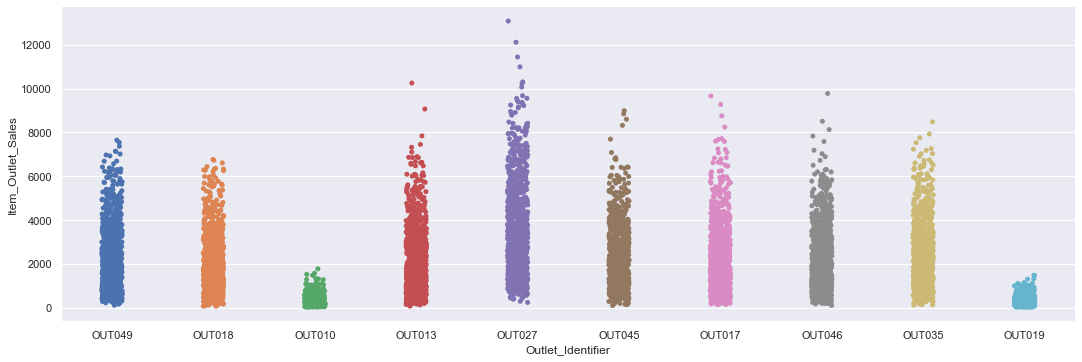

In [56]:
sns.catplot(x='Outlet_Identifier',y='Item_Outlet_Sales',data=df_train,aspect=3)
print(cat["Outlet_Identifier"].value_counts())

In [57]:
# we can say that outlet027 is generating most sales from this plot

Medium    5203
Small     2388
High       932
Name: Outlet_Size, dtype: int64


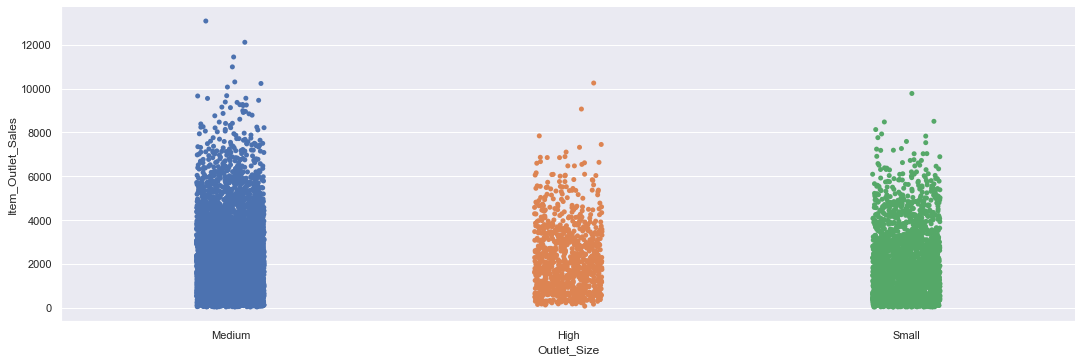

In [58]:
sns.catplot(x='Outlet_Size',y='Item_Outlet_Sales',data=df_train,aspect=3)
print(cat["Outlet_Size"].value_counts())

In [59]:
#we can see that medium sized outlet generate most sales

Tier 3    3350
Tier 2    2785
Tier 1    2388
Name: Outlet_Location_Type, dtype: int64


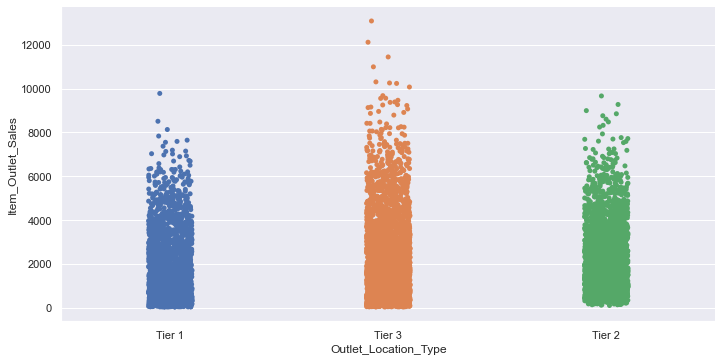

In [60]:
sns.catplot(x='Outlet_Location_Type',y='Item_Outlet_Sales',data=df_train,aspect=2)
print(cat["Outlet_Location_Type"].value_counts())

In [61]:
#we can see that tier3 location is playing exceptionally well than others.

Supermarket Type1    5577
Grocery Store        1083
Supermarket Type3     935
Supermarket Type2     928
Name: Outlet_Type, dtype: int64


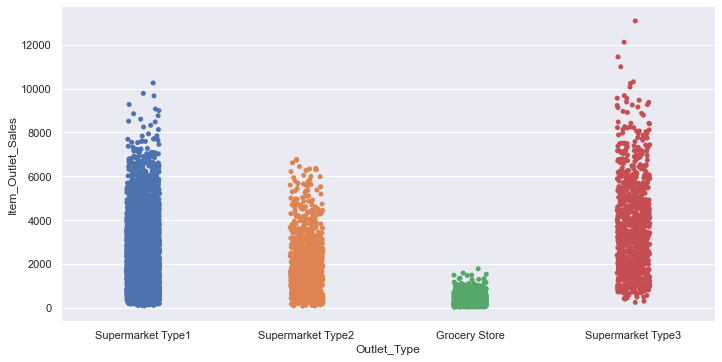

In [62]:
sns.catplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df_train,aspect=2)
print(cat["Outlet_Type"].value_counts())

In [63]:
#we can see  that supermarket Type1 and supermarket Type3 are generating most sales

In [ ]:
y=df_train['Item_Outlet_Sales']
x=df_train.drop(columns = ['Item_Outlet_Sales'])

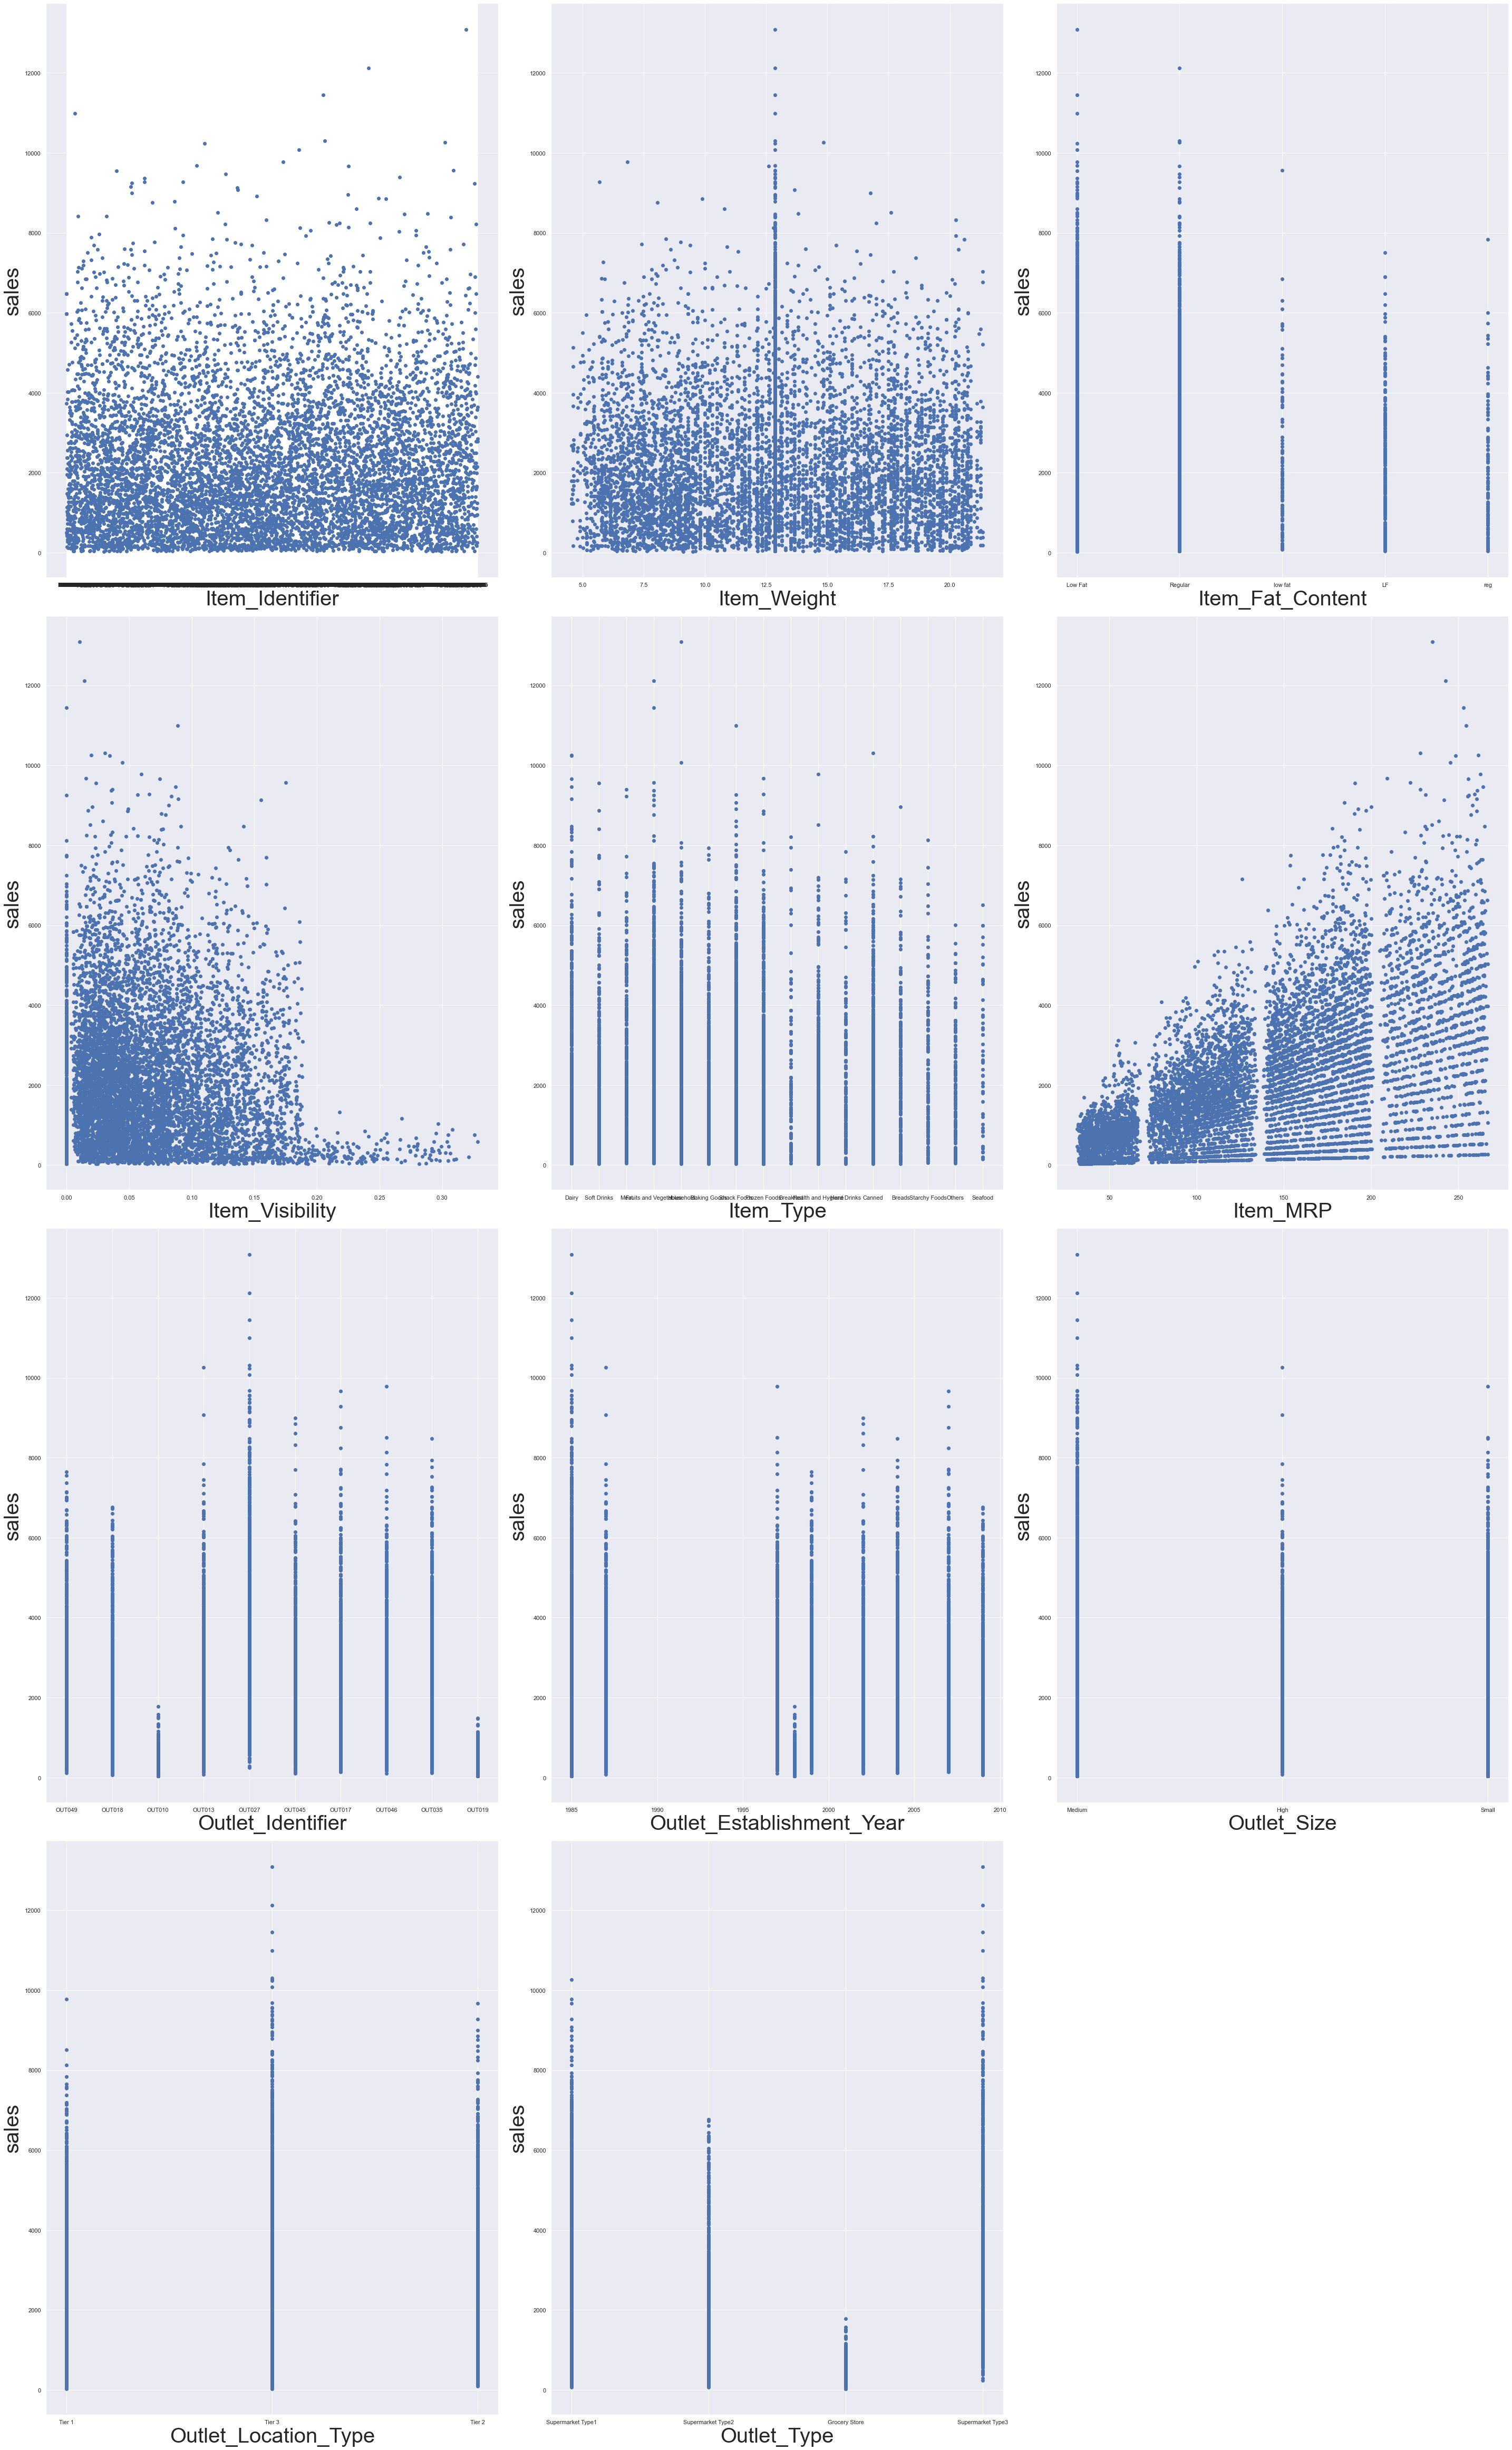

In [68]:
plt.figure(figsize=(40,80),facecolor='white')
plotnumber = 1

for  column in x:
    if plotnumber<=12:
        ax=plt.subplot(5,3,plotnumber)
        plt.scatter(df_train[column],y)
        plt.xlabel(column,fontsize=40)
        plt.ylabel('sales',fontsize=40)
         
    plotnumber+=1
plt.tight_layout()

In [69]:
#we can have some interpretation from this plot but mostly cant give a good idea about the data.

In [70]:
cont.columns

Index(['Item_Weight', 'Item_Visibility', 'Item_MRP',
       'Outlet_Establishment_Year', 'Item_Outlet_Sales'],
      dtype='object')

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Weight', ylabel='Density'>

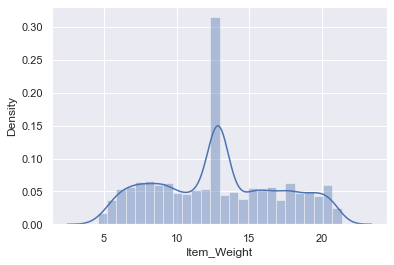

In [71]:
sns.distplot(df_train["Item_Weight"])

In [72]:
#we can see a pritty much big skewness in both side but does items weight have something to do with sales.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Visibility', ylabel='Density'>

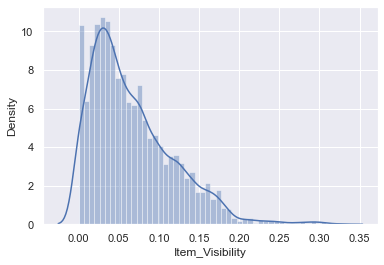

In [73]:
sns.distplot(df_train["Item_Visibility"])

In [74]:
# we can see some right skewness which shows visibility skewness mostly range from 0,10 to 0,20 approx

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_MRP', ylabel='Density'>

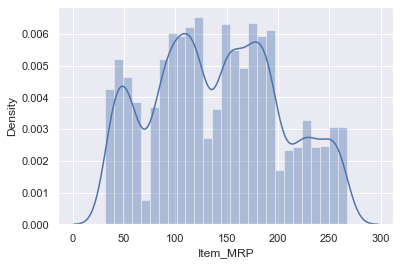

In [75]:
sns.distplot(df_train["Item_MRP"])

In [76]:
# we can see that the mrp has a huge data fluctuation but it is normal as we know that mrp of a product is its own

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Outlet_Establishment_Year', ylabel='Density'>

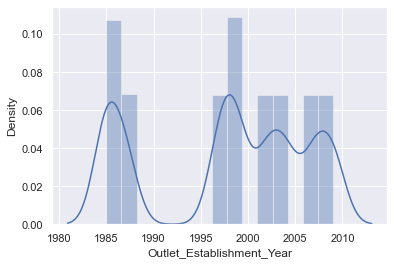

In [77]:
sns.distplot(df_train["Outlet_Establishment_Year"])

In [78]:
#we can see a pritty much big skewness in both side but does establishment year have something to do with sales.

C:\Users\91954\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Item_Outlet_Sales', ylabel='Density'>

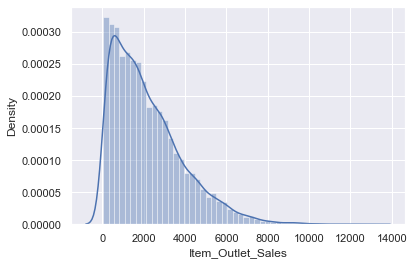

In [79]:
sns.distplot(df_train["Item_Outlet_Sales"])

In [80]:
#we can see a pritty much big skewness in both side but does establishment year have something to do with sales.

In [81]:
Y=df_train['Item_Outlet_Sales']
X=df_train.drop(columns = ['Item_Outlet_Sales'])

In [82]:
# now lets take out those columns which we dont need for predicting sales and we have came to this conclusion after visualizing the above

In [83]:
cat#as we can see we dont need item identifier

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Medium,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Medium,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [84]:
cont#as we can see itemweight,establishment year are not needed to predict sales.

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
0,9.300,0.016047,249.8092,1999,3735.1380
1,5.920,0.019278,48.2692,2009,443.4228
2,17.500,0.016760,141.6180,1999,2097.2700
3,19.200,0.000000,182.0950,1998,732.3800
4,8.930,0.000000,53.8614,1987,994.7052
...,...,...,...,...,...
8518,6.865,0.056783,214.5218,1987,2778.3834
8519,8.380,0.046982,108.1570,2002,549.2850
8520,10.600,0.035186,85.1224,2004,1193.1136
8521,7.210,0.145221,103.1332,2009,1845.5976


In [ ]:

df_train=df_train.drop('Item_Weight',axis=1)

In [92]:
df_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,Low Fat,0.016047,Dairy,249.8092,OUT049,Medium,Tier 1,Supermarket Type1,3735.1380
1,Regular,0.019278,Soft Drinks,48.2692,OUT018,Medium,Tier 3,Supermarket Type2,443.4228
2,Low Fat,0.016760,Meat,141.6180,OUT049,Medium,Tier 1,Supermarket Type1,2097.2700
3,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,Medium,Tier 3,Grocery Store,732.3800
4,Low Fat,0.000000,Household,53.8614,OUT013,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...
8518,Low Fat,0.056783,Snack Foods,214.5218,OUT013,High,Tier 3,Supermarket Type1,2778.3834
8519,Regular,0.046982,Baking Goods,108.1570,OUT045,Medium,Tier 2,Supermarket Type1,549.2850
8520,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,Small,Tier 2,Supermarket Type1,1193.1136
8521,Regular,0.145221,Snack Foods,103.1332,OUT018,Medium,Tier 3,Supermarket Type2,1845.5976


In [95]:
df_test=df_test.drop('Outlet_Establishment_Year',axis=1)
df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,Low Fat,0.007565,Snack Foods,107.8622,OUT049,Medium,Tier 1,Supermarket Type1
1,reg,0.038428,Dairy,87.3198,OUT017,Medium,Tier 2,Supermarket Type1
2,Low Fat,0.099575,Others,241.7538,OUT010,Medium,Tier 3,Grocery Store
3,Low Fat,0.015388,Snack Foods,155.0340,OUT017,Medium,Tier 2,Supermarket Type1
4,Regular,0.118599,Dairy,234.2300,OUT027,Medium,Tier 3,Supermarket Type3
...,...,...,...,...,...,...,...,...
5676,Regular,0.013496,Snack Foods,141.3154,OUT046,Small,Tier 1,Supermarket Type1
5677,Regular,0.142991,Starchy Foods,169.1448,OUT018,Medium,Tier 3,Supermarket Type2
5678,Low Fat,0.073529,Health and Hygiene,118.7440,OUT045,Medium,Tier 2,Supermarket Type1
5679,Regular,0.000000,Canned,214.6218,OUT017,Medium,Tier 2,Supermarket Type1


In [ ]:
#some preprocessing or encoding technique

In [96]:
from sklearn.preprocessing import OrdinalEncoder
en=OrdinalEncoder()
for i in df_train.columns:
    if df_train[i].dtypes=='object':
        df_train[i]=en.fit_transform(df_train[i].values.reshape(-1,1))
    
    

In [97]:
for i in df_test.columns:
    if df_test[i].dtypes=='object':
        df_test[i]=en.fit_transform(df_test[i].values.reshape(-1,1))
    
    

In [98]:
df_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,1.0,0.016047,4.0,249.8092,9.0,1.0,0.0,1.0,3735.1380
1,2.0,0.019278,14.0,48.2692,3.0,1.0,2.0,2.0,443.4228
2,1.0,0.016760,10.0,141.6180,9.0,1.0,0.0,1.0,2097.2700
3,2.0,0.000000,6.0,182.0950,0.0,1.0,2.0,0.0,732.3800
4,1.0,0.000000,9.0,53.8614,1.0,0.0,2.0,1.0,994.7052
...,...,...,...,...,...,...,...,...,...
8518,1.0,0.056783,13.0,214.5218,1.0,0.0,2.0,1.0,2778.3834
8519,2.0,0.046982,0.0,108.1570,7.0,1.0,1.0,1.0,549.2850
8520,1.0,0.035186,8.0,85.1224,6.0,2.0,1.0,1.0,1193.1136
8521,2.0,0.145221,13.0,103.1332,3.0,1.0,2.0,2.0,1845.5976


In [99]:
df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,1.0,0.007565,13.0,107.8622,9.0,1.0,0.0,1.0
1,4.0,0.038428,4.0,87.3198,2.0,1.0,1.0,1.0
2,1.0,0.099575,11.0,241.7538,0.0,1.0,2.0,0.0
3,1.0,0.015388,13.0,155.0340,2.0,1.0,1.0,1.0
4,2.0,0.118599,4.0,234.2300,5.0,1.0,2.0,3.0
...,...,...,...,...,...,...,...,...
5676,2.0,0.013496,13.0,141.3154,8.0,2.0,0.0,1.0
5677,2.0,0.142991,15.0,169.1448,3.0,1.0,2.0,2.0
5678,1.0,0.073529,8.0,118.7440,7.0,1.0,1.0,1.0
5679,2.0,0.000000,3.0,214.6218,2.0,1.0,1.0,1.0


In [100]:
df_train.corr()

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
Item_Fat_Content,1.000000,0.034042,-0.115958,-0.000876,-0.002357,-0.012058,-0.004102,-0.004214,0.009800
Item_Visibility,0.034042,1.000000,-0.035249,-0.001315,-0.100439,0.069309,-0.028099,-0.173468,-0.128625
Item_Type,-0.115958,-0.035249,1.000000,0.032651,0.001656,-0.001859,0.003084,0.003053,0.017048
Item_MRP,-0.000876,-0.001315,0.032651,1.000000,0.003319,0.006059,0.000232,-0.001975,0.567574
Outlet_Identifier,-0.002357,-0.100439,0.001656,0.003319,1.000000,0.504603,-0.716176,0.099873,0.162325
Outlet_Size,-0.012058,0.069309,-0.001859,0.006059,0.504603,1.000000,-0.614311,-0.201483,-0.086182
Outlet_Location_Type,-0.004102,-0.028099,0.003084,0.000232,-0.716176,-0.614311,1.000000,0.467219,0.089367
Outlet_Type,-0.004214,-0.173468,0.003053,-0.001975,0.099873,-0.201483,0.467219,1.000000,0.401522
Item_Outlet_Sales,0.009800,-0.128625,0.017048,0.567574,0.162325,-0.086182,0.089367,0.401522,1.000000


<AxesSubplot:>

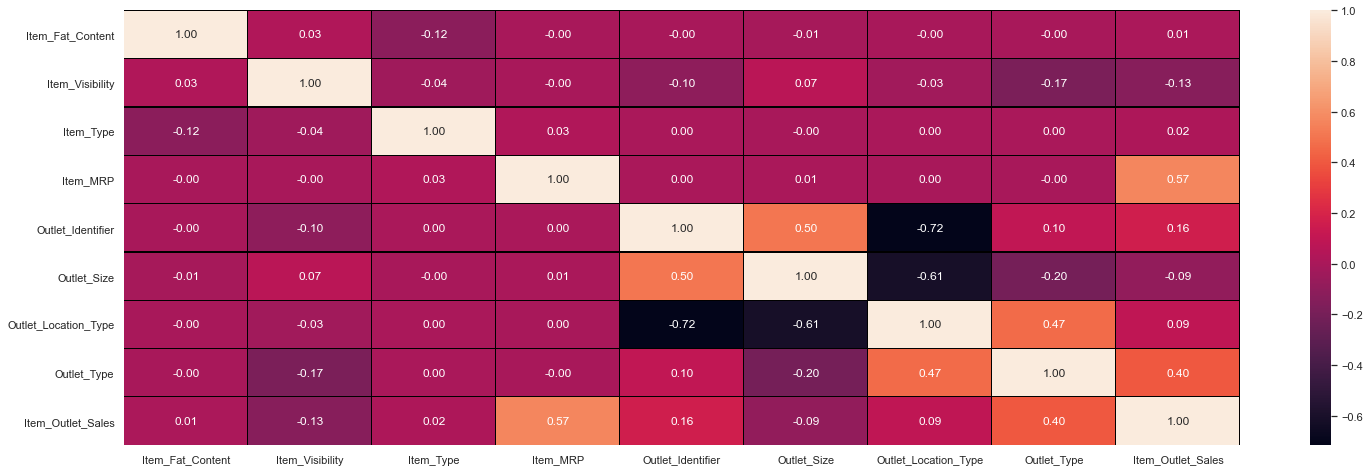

In [101]:
plt.figure(figsize=(25,8),facecolor='white')
sns.heatmap(df_train.corr(),annot=True,linewidths=0.1,linecolor='black',fmt='0.2f')

In [ ]:
#we can see the highest relationship of sales is with mrp and also outlet_Type
#but we can also see outlet -type and outlet_location_type also have some good relations lets find out they have multicoliniarity or not

In [102]:
corr_matrix=df_train.corr()
corr_matrix["Item_Outlet_Sales"].sort_values(ascending=True)

Item_Visibility        -0.128625
Outlet_Size            -0.086182
Item_Fat_Content        0.009800
Item_Type               0.017048
Outlet_Location_Type    0.089367
Outlet_Identifier       0.162325
Outlet_Type             0.401522
Item_MRP                0.567574
Item_Outlet_Sales       1.000000
Name: Item_Outlet_Sales, dtype: float64

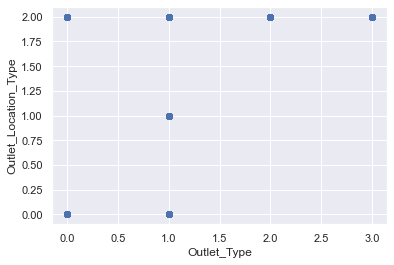

In [103]:
plt.scatter(df_train.Outlet_Type,df_train.Outlet_Location_Type)
plt.xlabel('Outlet_Type')
plt.ylabel('Outlet_Location_Type')
plt.show()

In [ ]:
# we can see that this two data are close ly related to each other and they are multicoliniear so we are eliminating Outlet location type.

In [104]:
df_train=df_train.drop('Outlet_Location_Type',axis=1)
df_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,1.0,0.016047,4.0,249.8092,9.0,1.0,1.0,3735.1380
1,2.0,0.019278,14.0,48.2692,3.0,1.0,2.0,443.4228
2,1.0,0.016760,10.0,141.6180,9.0,1.0,1.0,2097.2700
3,2.0,0.000000,6.0,182.0950,0.0,1.0,0.0,732.3800
4,1.0,0.000000,9.0,53.8614,1.0,0.0,1.0,994.7052
...,...,...,...,...,...,...,...,...
8518,1.0,0.056783,13.0,214.5218,1.0,0.0,1.0,2778.3834
8519,2.0,0.046982,0.0,108.1570,7.0,1.0,1.0,549.2850
8520,1.0,0.035186,8.0,85.1224,6.0,2.0,1.0,1193.1136
8521,2.0,0.145221,13.0,103.1332,3.0,1.0,2.0,1845.5976


In [109]:
df_test=df_test.drop('Outlet_Location_Type',axis=1)
df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,1.0,0.007565,13.0,107.8622,9.0,1.0,1.0
1,4.0,0.038428,4.0,87.3198,2.0,1.0,1.0
2,1.0,0.099575,11.0,241.7538,0.0,1.0,0.0
3,1.0,0.015388,13.0,155.0340,2.0,1.0,1.0
4,2.0,0.118599,4.0,234.2300,5.0,1.0,3.0
...,...,...,...,...,...,...,...
5676,2.0,0.013496,13.0,141.3154,8.0,2.0,1.0
5677,2.0,0.142991,15.0,169.1448,3.0,1.0,2.0
5678,1.0,0.073529,8.0,118.7440,7.0,1.0,1.0
5679,2.0,0.000000,3.0,214.6218,2.0,1.0,1.0


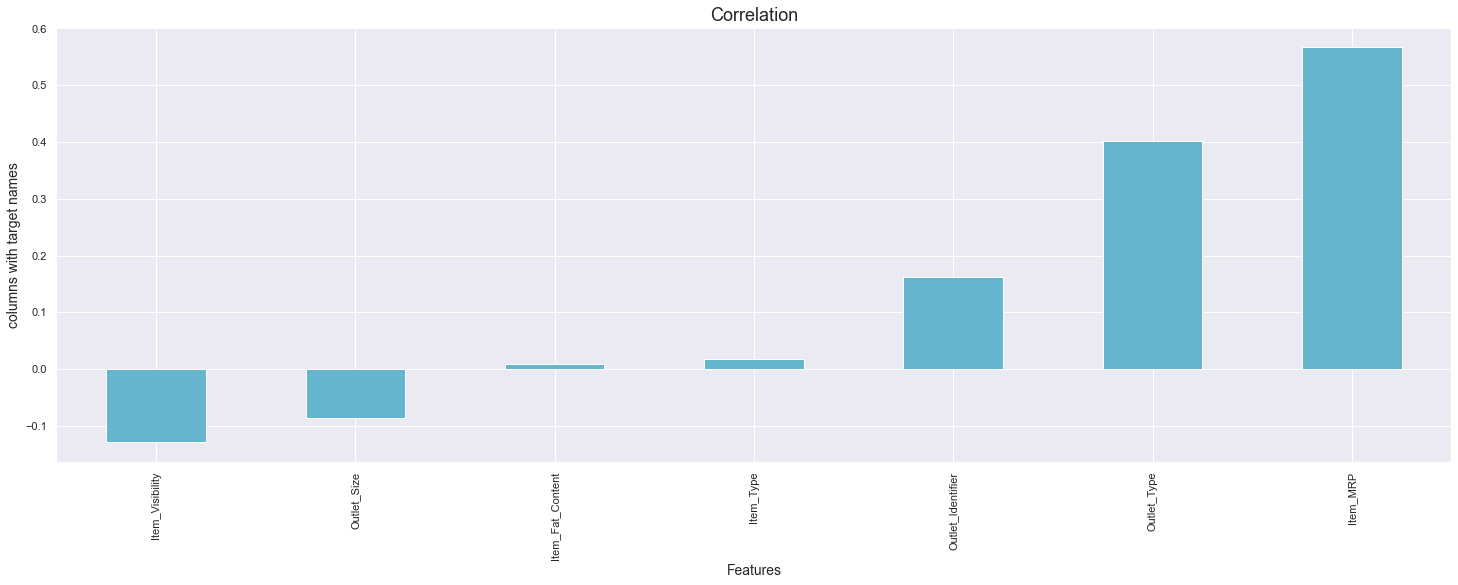

In [110]:
plt.figure(figsize=(25,8))
df_train.corr()['Item_Outlet_Sales'].sort_values(ascending=True).drop(['Item_Outlet_Sales']).plot(kind='bar',color='c')
plt.xlabel('Features',fontsize=14)
plt.ylabel('columns with target names',fontsize=14)
plt.title('Correlation',fontsize=18)
plt.show()

In [ ]:
#we can see that thecorr with mrp outlet type has the highest corr with sales.
#and negative with visibility and outlet size


In [111]:
df_train.skew()

Item_Fat_Content     0.994824
Item_Visibility      1.167091
Item_Type            0.101655
Item_MRP             0.127202
Outlet_Identifier   -0.059861
Outlet_Size         -0.087072
Outlet_Type          0.927438
Item_Outlet_Sales    1.177531
dtype: float64

In [ ]:
# we can see skeww ness of transformed data

In [112]:
df_test

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type
0,1.0,0.007565,13.0,107.8622,9.0,1.0,1.0
1,4.0,0.038428,4.0,87.3198,2.0,1.0,1.0
2,1.0,0.099575,11.0,241.7538,0.0,1.0,0.0
3,1.0,0.015388,13.0,155.0340,2.0,1.0,1.0
4,2.0,0.118599,4.0,234.2300,5.0,1.0,3.0
...,...,...,...,...,...,...,...
5676,2.0,0.013496,13.0,141.3154,8.0,2.0,1.0
5677,2.0,0.142991,15.0,169.1448,3.0,1.0,2.0
5678,1.0,0.073529,8.0,118.7440,7.0,1.0,1.0
5679,2.0,0.000000,3.0,214.6218,2.0,1.0,1.0


In [113]:
from sklearn.preprocessing import power_transform
df_new=power_transform(df_train)


df_train=pd.DataFrame(df_new,columns=df_train.columns)

    

In [114]:
df_new2=power_transform(df_test)


df_test=pd.DataFrame(df_new2,columns=df_test.columns)


In [115]:
df_train.skew()

Item_Fat_Content     0.032643
Item_Visibility      0.124279
Item_Type           -0.164574
Item_MRP            -0.115386
Outlet_Identifier   -0.213935
Outlet_Size         -0.042980
Outlet_Type          0.007863
Item_Outlet_Sales   -0.074791
dtype: float64

In [ ]:
#we have reduced the skewness and we are taking the threshold 0.25

In [116]:
df_test.skew()

Item_Fat_Content     0.032646
Item_Visibility      0.116776
Item_Type           -0.167431
Item_MRP            -0.111040
Outlet_Identifier   -0.214064
Outlet_Size         -0.042981
Outlet_Type          0.007830
dtype: float64

In [ ]:
#we have reduced the skewness and we are taking the threshold 0.25

In [117]:
df_train.skew()[np.abs(df_train.skew())<0.25].all()

True

In [118]:
df_test.skew()[np.abs(df_test.skew())<0.25].all()

True

In [119]:
df_train

,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,-0.520977,-1.146886,-0.712347,1.623670,1.427394,-0.293295,-0.123488,0.985078
1,1.009871,-1.037100,1.504660,-1.595016,-0.548577,-0.293295,1.040591,-1.218135
2,-0.520977,-1.122375,0.684390,0.081237,1.427394,-0.293295,-0.123488,0.220360
3,1.009871,-1.745551,-0.215420,0.689968,-1.809119,-0.293295,-1.915952,-0.835183
4,-0.520977,-1.745551,0.468410,-1.476078,-1.343810,-1.925925,-0.123488,-0.566616
...,...,...,...,...,...,...,...,...
8518,-0.520977,0.020310,1.305304,1.148258,-1.343810,-1.925925,-0.123488,0.573946
8519,1.009871,-0.221388,-1.923750,-0.463127,0.810513,-0.293295,-0.123488,-1.062855
8520,-0.520977,-0.542979,0.246996,-0.867930,0.489168,1.390694,-0.123488,-0.393044
8521,1.009871,1.459990,1.305304,-0.548996,-0.548577,-0.293295,1.040591,0.070669


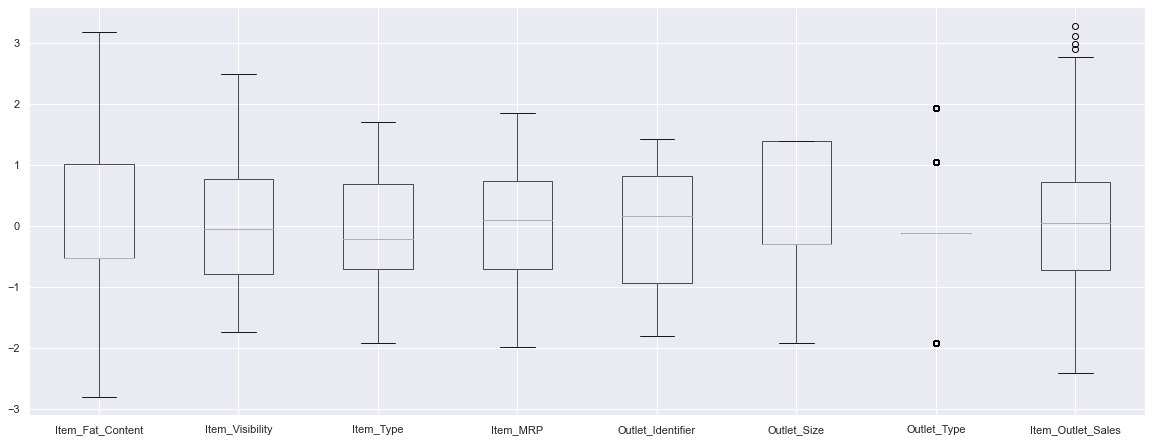

In [121]:
df_train.iloc[:,0:].boxplot(figsize=[20,9])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [ ]:
# we will not do z score technique to find the outlier as the most of the data is categorical data and outliers are not considered in categorical data

In [123]:
x=df_train.drop("Item_Outlet_Sales",axis=1)
y=df_train['Item_Outlet_Sales']

In [124]:
sc=StandardScaler()# standerdizing the data
x=sc.fit_transform(x)
x

array([[-0.52097741, -1.14688621, -0.71234723, ...,  1.42739386,
        -0.29329517, -0.12348771],
       [ 1.00987141, -1.03709991,  1.50465979, ..., -0.54857657,
        -0.29329517,  1.04059102],
       [-0.52097741, -1.12237453,  0.68439021, ...,  1.42739386,
        -0.29329517, -0.12348771],
       ...,
       [-0.52097741, -0.54297932,  0.24699567, ...,  0.48916807,
         1.390694  , -0.12348771],
       [ 1.00987141,  1.45998957,  1.30530437, ..., -0.54857657,
        -0.29329517,  1.04059102],
       [-0.52097741, -0.27619496,  1.50465979, ...,  1.12284847,
         1.390694  , -0.12348771]])

In [125]:
# standerdizing the data
df_test=sc.fit_transform(df_test)
df_test

array([[-0.5240889 , -1.46206861,  1.30168635, ...,  1.42740012,
        -0.29345691, -0.12353311],
       [ 3.19413231, -0.44801894, -0.71243299, ..., -0.93109596,
        -0.29345691, -0.12353311],
       [-0.5240889 ,  0.87134242,  0.89224046, ..., -1.80907914,
        -0.29345691, -1.91575348],
       ...,
       [-0.5240889 ,  0.39786781,  0.24455306, ...,  0.81035756,
        -0.29345691, -0.12353311],
       [ 1.01563473, -1.76023409, -0.9780988 , ..., -0.93109596,
        -0.29345691, -0.12353311],
       [ 1.01563473,  0.9524881 , -0.9780988 , ...,  0.81035756,
        -0.29345691, -0.12353311]])

In [126]:
y

0       0.985078
1      -1.218135
2       0.220360
3      -0.835183
4      -0.566616
          ...   
8518    0.573946
8519   -1.062855
8520   -0.393044
8521    0.070669
8522   -0.797934
Name: Item_Outlet_Sales, Length: 8523, dtype: float64

In [127]:
lr=LinearRegression()
for i in range(0,1000):
    X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=i)
    lr.fit(X_train,Y_train)
    pred_train=lr.predict(X_train)
    pred_test=lr.predict(X_test)
    print(f"At random state{i},the training accuracy is :- {r2_score(Y_train,pred_train)}")
    print(f"At random state{i},the testing  accuracy is :- {r2_score(Y_test,pred_test)}")
    print('\n')

At random state0,the training accuracy is :- 0.6186627808814024
At random state0,the testing  accuracy is :- 0.6043597167828012


At random state1,the training accuracy is :- 0.6172569053353516
At random state1,the testing  accuracy is :- 0.6060147610089073


At random state2,the training accuracy is :- 0.608114076348665
At random state2,the testing  accuracy is :- 0.6196844096678105


At random state3,the training accuracy is :- 0.6079475113982443
At random state3,the testing  accuracy is :- 0.6203142941603925


At random state4,the training accuracy is :- 0.6180840051046921
At random state4,the testing  accuracy is :- 0.6048793660569465


At random state5,the training accuracy is :- 0.6163244534919086
At random state5,the testing  accuracy is :- 0.6077366286875441


At random state6,the training accuracy is :- 0.6123143550371574
At random state6,the testing  accuracy is :- 0.6129338562244968


At random state7,the training accuracy is :- 0.6178699773166831
At random state7,the testin

In [128]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.4,random_state=21)

In [129]:
lr.fit(X_train,Y_train)

LinearRegression()

In [130]:
pred_test=lr.predict(X_test)
print(r2_score(Y_test,pred_test))

0.613480710267636


In [ ]:
#we can see that the accuracy is same as the random state.

In [131]:
Train_accuracy=r2_score(Y_train,pred_train)
Test_accuracy=r2_score(Y_test,pred_test)
from sklearn.model_selection import cross_val_score
for j in range(2,10):
    cv_score=cross_val_score(lr,x,y,cv=j)
    cv_mean=cv_score.mean()
    print(f"At cross fold {j} the cv score is {cv_mean} and accuracy score for training is {Train_accuracy} and accuracy score for testing is {Test_accuracy}")
    print('\n')
    

At cross fold 2 the cv score is 0.6119585294764078 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 3 the cv score is 0.6120092871069623 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 4 the cv score is 0.6114453228134554 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 5 the cv score is 0.6116383642453436 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 6 the cv score is 0.6118590739945501 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 7 the cv score is 0.6121093383013866 and accuracy score for training is -0.5879330993026026 and accuracy score for testing is 0.613480710267636


At cross fold 8 the cv score is 0.611737

In [ ]:
#as the cv score  impacted the training accuracy  we are taking cv =5

In [132]:
x

array([[-0.52097741, -1.14688621, -0.71234723, ...,  1.42739386,
        -0.29329517, -0.12348771],
       [ 1.00987141, -1.03709991,  1.50465979, ..., -0.54857657,
        -0.29329517,  1.04059102],
       [-0.52097741, -1.12237453,  0.68439021, ...,  1.42739386,
        -0.29329517, -0.12348771],
       ...,
       [-0.52097741, -0.54297932,  0.24699567, ...,  0.48916807,
         1.390694  , -0.12348771],
       [ 1.00987141,  1.45998957,  1.30530437, ..., -0.54857657,
        -0.29329517,  1.04059102],
       [-0.52097741, -0.27619496,  1.50465979, ...,  1.12284847,
         1.390694  , -0.12348771]])

In [133]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
X_new = SelectKBest( f_regression,k=5).fit_transform(x, y)
X_new


array([[-1.14688621,  1.62367023,  1.42739386, -0.29329517, -0.12348771],
       [-1.03709991, -1.59501643, -0.54857657, -0.29329517,  1.04059102],
       [-1.12237453,  0.08123678,  1.42739386, -0.29329517, -0.12348771],
       ...,
       [-0.54297932, -0.86792986,  0.48916807,  1.390694  , -0.12348771],
       [ 1.45998957, -0.54899589, -0.54857657, -0.29329517,  1.04059102],
       [-0.27619496, -1.04722682,  1.12284847,  1.390694  , -0.12348771]])

In [ ]:
#this are the best values

In [ ]:
#regularization

In [139]:
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import Lasso
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,30)),'selection':['cyclic', 'random']}
ls=Lasso()
clf=GridSearchCV(ls,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)



{'alpha': 0.001, 'random_state': 25, 'selection': 'random'}


In [140]:
ls=Lasso(alpha=0.001,random_state=25,selection='random')
ls.fit(X_train,Y_train)
ls.score(X_train,Y_train)
pred_ls=ls.predict(X_test)
lss=r2_score(Y_test,pred_ls)
lss

0.6134661207660053

In [141]:
cv_score=cross_val_score(ls,x,y,cv=5)
cv_mean=cv_score.mean()
cv_mean

0.6116545782387028

In [142]:
from sklearn.linear_model import Ridge
parameters={"alpha":[.0001,.001,.01,.1,1,10],'random_state':list(range(0,10)),'solver':['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']}
rs=Ridge()
clf=GridSearchCV(rs,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)


{'alpha': 10, 'random_state': 6, 'solver': 'sag'}


In [143]:
rs=Ridge(alpha=10,random_state=6,solver='sag')
rs.fit(X_train,Y_train)
rs.score(X_train,Y_train)
pred_rs=rs.predict(X_test)
rss=r2_score(Y_test,pred_ls)
rss

0.6134661207660053

In [144]:
cv_score=cross_val_score(rs,x,y,cv=4)
cv_mean=cv_score.mean()
cv_mean

0.6114524542384088

In [ ]:
# our model is giving good accuracy from regularization but the r2 score and cv_mean is having not much difference after all this regularization.

In [ ]:
#ensemble techniques

In [146]:
from sklearn.ensemble import RandomForestRegressor
parameters={'criterion':['mse','mae'],'max_features':['auto','sqrt','log2']}
rf=RandomForestRegressor()
clf=GridSearchCV(rf,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'criterion': 'mae', 'max_features': 'sqrt'}


In [148]:
rf=RandomForestRegressor(criterion='mae',max_features='sqrt')
rf.fit(X_train,Y_train)
rf.score(X_train,Y_train)
pred_decision=rf.predict(X_test)
rfs=r2_score(Y_test,pred_decision)
print('r2_score:',rfs*100)
rfscore=cross_val_score(rf,x,y,cv=5)
rfc=rfscore.mean()
print('cross_val_score:',rfc*100)

r2_score: 67.52185466184508
cross_val_score: 67.10894484799724


In [ ]:
#random rainforest improves the the score 

In [ ]:
#knn model

In [149]:
from sklearn.neighbors import KNeighborsRegressor
parameters={'n_neighbors':[1,2,3,4,5],'algorithm':[ 'kd_tree', 'brute'],'leaf_size':[10,15,20,25,30,35]}
kn=KNeighborsRegressor()
clf=GridSearchCV(kn,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'algorithm': 'kd_tree', 'leaf_size': 10, 'n_neighbors': 5}


In [150]:
kn= KNeighborsRegressor(n_neighbors=5,algorithm='kd_tree',leaf_size=10)
kn.fit(X_train,Y_train)
kn.score(X_train,Y_train)
pred_decision=kn.predict(X_test)
knn=r2_score(Y_test,pred_decision)
print('r2_score:',knn*100)
knscore=cross_val_score(kn,x,y,cv=4)
knc=knscore.mean()
print('cross_val_score:',knc*100)

r2_score: 64.02355957742033
cross_val_score: 63.5002007853243


In [ ]:
#knn is also giving more score than linera model 

In [151]:
from sklearn.ensemble import BaggingRegressor
parameters={'max_features':[1,2,3],'random_state':list(range(0,10))}
bg=BaggingRegressor()
clf=GridSearchCV(bg,parameters)
clf.fit(X_train,Y_train)
print(clf.best_params_)

{'max_features': 3, 'random_state': 7}


In [152]:
bg=BaggingRegressor(max_features=3,random_state=7)
bg.fit(X_train,Y_train)
bg.score(X_train,Y_train)
pred_decision=bg.predict(X_test)
bgg=r2_score(Y_test,pred_decision)
print('r2_score:',bgg*100)
bgscore=cross_val_score(bg,x,y,cv=4)
bgc=bgscore.mean()
print('cross_val_score:',bgc*100)

r2_score: 58.8265991628771
cross_val_score: 58.678469612121695


In [ ]:
#bagging is not giving good score

In [153]:
r2_score= {
    'model':['linear regression', 'random forest','KNeighborsRegressor','bagging'],
    'R2score':[62.22111167406236,67.2789514668126,64.7913156591241, 58.372819881172035 ]
}
r2_Score=pd.DataFrame(data=r2_score)
r2_Score.sort_values(by=['R2score'], ascending=False)

,model,R2score
1,random forest,67.278951
2,KNeighborsRegressor,64.791316
0,linear regression,62.221112
3,bagging,58.372820


In [ ]:
#we conclude random forent has the best model 

In [154]:
filename='bigmart sales.pkl'
pickle.dump(rf,open(filename,'wb'))



In [155]:
loaded_model=pickle.load(open('bigmart sales.pkl','rb'))
result=loaded_model.score(X_test,Y_test)
print(result)

0.6752185466184508


In [157]:
df_test.shape

(5681, 7)

In [156]:
conclusion=pd.DataFrame([loaded_model.predict(df_test)],index=['Predicted'])
conclusion

,0,1,2,3,4,5,6,7,8,9,...,5671,5672,5673,5674,5675,5676,5677,5678,5679,5680
Predicted,-0.20424,-0.193367,-1.024203,0.007939,1.318213,0.050319,-0.898641,-0.08412,-0.4039,0.548978,...,-0.853875,0.885366,-0.106364,-0.901506,-0.584912,0.035294,0.506877,-0.107755,0.966689,-0.385275


In [ ]:
#so this is the predicted data